In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
iris_df = pd.DataFrame(iris.data, columns = [iris.feature_names])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
from sklearn.preprocessing import StandardScaler
x = iris.data
x_std = StandardScaler().fit_transform(x)
print(x[:15])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]]


In [9]:
print(x_std[:15])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]
 [-0.53717756  1.47939788 -1.2833891  -1.3154443 ]
 [-1.26418478  0.78880759 -1.22655167 -1.3154443 ]
 [-1.26418478 -0.13197948 -1.34022653 -1.44707648]
 [-1.87002413 -0.13197948 -1.51073881 -1.44707648]
 [-0.05250608  2.16998818 -1.45390138 -1.3154443 ]]


In [17]:
x_covariance_matrix = np.cov(x_std.T)
x_covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [18]:
eig_vals, eig_vecs = np.linalg.eig(x_covariance_matrix)

print('Eigen Vectors are: \n', eig_vecs)
print('Eigen Values are: \n', eig_vals)

Eigen Vectors are: 
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]
Eigen Values are: 
 [2.93808505 0.9201649  0.14774182 0.02085386]


In [23]:
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in eig_vals]
cum_var_exp = np.cumsum(var_exp)

print("Variance captured by each component is \n", var_exp)
print(77*'-')
print("Cumulative variance is \n", cum_var_exp)

Variance captured by each component is 
 [72.96244541329983, 22.850761786701817, 3.668921889282866, 0.5178709107154746]
-----------------------------------------------------------------------------
Cumulative variance is 
 [ 72.96244541  95.8132072   99.48212909 100.        ]


In [26]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
eig_pairs

[(2.9380850501999927,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.9201649041624892,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.1477418210449476,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.020853862176462064,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

In [27]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4, 1), 
                     eig_pairs[1][1].reshape(4, 1)))

print('Matrix W: \n', matrix_w)

Matrix W: 
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [31]:
Y = x_std.dot(matrix_w)
Y[:10]

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538],
       [-2.07563095, -1.48917752],
       [-2.44402884, -0.0476442 ],
       [-2.23284716, -0.22314807],
       [-2.33464048,  1.11532768],
       [-2.18432817,  0.46901356]])

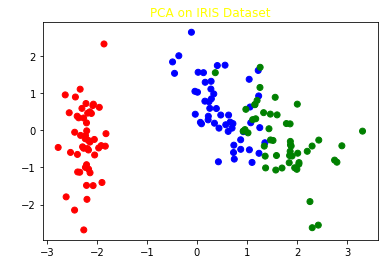

In [32]:
target_names = iris.target_names
y = iris.target

colors = ['red', 'blue', 'green', 'red', 'maroon']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

plt.scatter(Y[:, 0], Y[:, 1], c=vectorizer(y))
plt.xlabel("Principal Component 1", c='white')
plt.ylabel("Principal Component 2", c='white')
plt.title('PCA on IRIS Dataset', c='yellow')
plt.show()